#### Library

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib
from urllib.request import urlopen

In [3]:
# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
	# return the image
	return image

In [4]:
#creating a method for capturing a BGR color pic
# METHOD #2: OpenCV, NumPy, and urllib
def url_to_image_color(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
	# return the image
	return image

#### Edge Detection

In [5]:
image = url_to_image('https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/UR-PSR_%28B738%29_at_Ben_Gurion_Airport.jpg/1200px-UR-PSR_%28B738%29_at_Ben_Gurion_Airport.jpg')

In [6]:
#resize
image_256x256 = cv2.resize(image,(256,256))

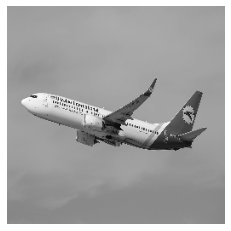

In [7]:
plt.imshow(image_256x256,cmap='gray')
plt.axis('off')
plt.show()

In [8]:
#median intensity
median_intensity = np.median(image_256x256)

In [9]:
median_intensity

158.0

In [10]:
#setting up threshold
lower_threshold = int(max(0,(1.0-0.33)*median_intensity))
higher_threshold = int(min(255,(1.0+0.33)*median_intensity))

In [11]:
#### Canny Edge Detenction
image_canny = cv2.Canny(image_256x256,lower_threshold,higher_threshold)

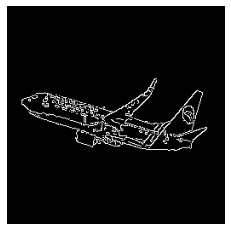

In [12]:
plt.imshow(image_canny,cmap='gray')
plt.axis('off')
plt.show()

#### Corner Detection

In [55]:
image_bgr = url_to_image_color('https://www.nationalgeographic.com/content/dam/animals/2020/05/guina/01-guina-nationalgeographic_2750749.adapt.1900.1.jpg')

In [56]:
image_gray = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2GRAY)

In [57]:
image_gray = np.float32(image_gray)

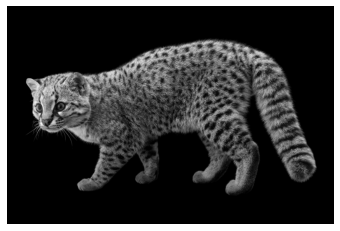

In [58]:
plt.imshow(image_gray,cmap='gray')
plt.axis('off')
plt.show()

In [59]:
### Parameter for Corner Detection
block_size = 2
aperture = 29
free_parameter = 0.04

In [60]:
#detect corner
detect_image = cv2.cornerHarris(image_gray,block_size,aperture,free_parameter)

In [61]:
#corner marker large
detection_response = cv2.dilate(detect_image,None)

In [62]:
#creating a threshold to keep the marker > threshold

In [70]:
threshold = 0.02
image_bgr[detection_response > threshold * detection_response.max()] = [255,255,255]

In [71]:
#converting to grayscale
image_gray_convert = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2GRAY)

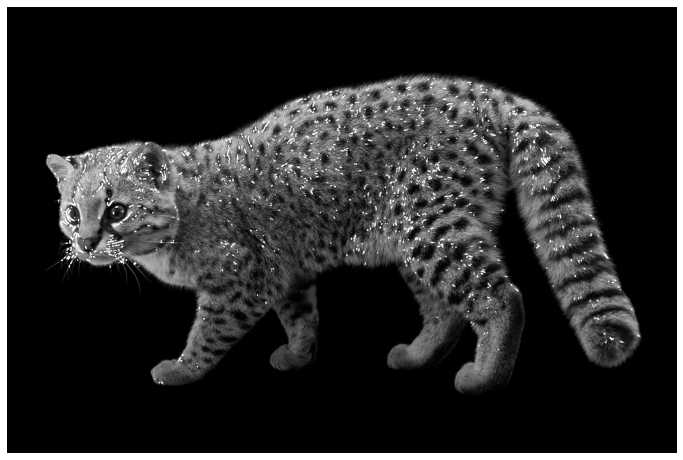

In [73]:
plt.figure(figsize=(12,9))
plt.imshow(image_gray_convert,cmap='gray')
plt.axis('off')
plt.show()

#### Corner Detection with GoodFeatureToTrack

In [74]:
image_c =url_to_image_color('https://www.jacksongalaxy.com/wp-content/uploads/2018/11/aggression-in-cats-800x450.jpg')

In [75]:
image_c_gray = cv2.cvtColor(image_c, cv2.COLOR_BGR2GRAY)

In [83]:
#no of cornet to detect
corners_to_detect = 50
minimum_quality_score = 0.05
minimul_distance = 25

In [84]:
corners = cv2.goodFeaturesToTrack(image_c_gray,corners_to_detect,minimum_quality_score,minimul_distance)

In [85]:
corners = np.float32(corners)

In [89]:
#drawing white circle 
for corner in corners:
  x, y = corner[0]
  cv2.circle(image_c, (x,y), 10, (0,255,255), -1)

In [90]:
image_rgb = cv2.cvtColor(image_c, cv2.COLOR_BGR2RGB)

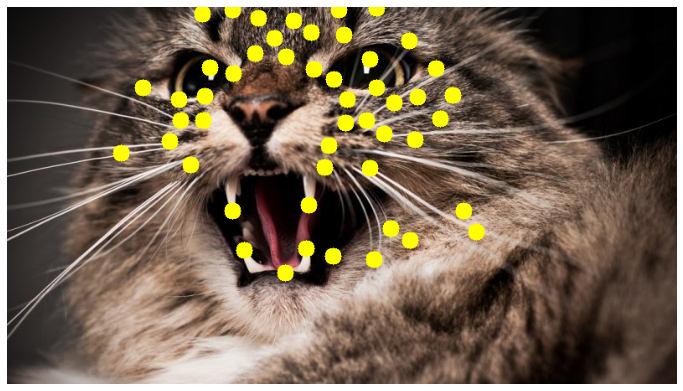

In [91]:
plt.figure(figsize=(12,8))
plt.imshow(image_rgb,cmap='gray')
plt.axis('off')
plt.show()

#### Preparing for ML

In [92]:
###numpy flatten to convert multi dimensional

In [93]:
image = url_to_image('https://api.time.com/wp-content/uploads/2015/06/gettyimages-98125846-1.jpg')

In [94]:
#resize
image_10x10 = cv2.resize(image,(10,10))

In [95]:
image_10x10.flatten()

array([ 11,  11,  11,  11,  11,  11,  10,  10,  10,  10,  10,  10,  11,
        11,  12,  12,  11,  10,  10,  10,  11,  13,  12,  11,  12,  11,
        11,  11,  11,  10,  11,  11,  12, 178, 236, 196, 202, 146,  10,
        10,  11,  11,  12,  75, 203,  88, 199,  15,  10,  33,  10,  11,
       141, 149, 168, 176, 201,  91,  10,  46,  11,  11, 156, 243,  81,
        66, 226, 103,  13,  42,  11,  39, 186, 221, 143, 178, 188, 155,
        69,  49,  10, 116, 136, 149,  18,  88, 196, 162,  47,  46,  14,
       104, 154, 207, 156, 209,  89, 125,  44,  40], dtype=uint8)

In [96]:
image_10x10.shape

(10, 10)

In [97]:
image_10x10.flatten().shape

(100,)

In [98]:
#normally grayscale image has white and black color code so it's showing 100
#if it was a color image it will show 300

In [99]:
image_c = url_to_image_color('https://api.time.com/wp-content/uploads/2015/06/gettyimages-98125846-1.jpg')

In [100]:
image_c_10x10 = cv2.resize(image_c,(10,10))

In [101]:
image_c_10x10.shape

(10, 10, 3)

In [102]:
image_c_10x10.flatten().shape

(300,)

#### Encode color as feature

In [104]:
image_c.shape

(1471, 2040, 3)

In [105]:
#convert to BGR2RGB
image_c_rgb = cv2.cvtColor(image_c,cv2.COLOR_BGR2RGB)

In [106]:
features = []

In [107]:
colors = ('r','g','b')

In [108]:
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_c_rgb], # Image
          [i], # Index of channel
          None, # No mask
          [256], # Histogram size
          [0,256]) # Range
    features.extend(histogram)

In [109]:
observation = np.array(features).flatten()

In [110]:
observation.shape

(768,)

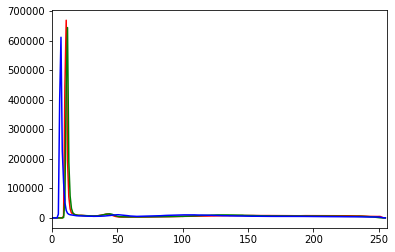

In [111]:
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_c_rgb], # Image
          [i], # Index of channel
          None, # No mask
          [256], # Histogram size
          [0,256]) # Range
    plt.plot(histogram,color=channel)
    plt.xlim(0,256)
plt.show()